# Exploring presidential commericals

The Internet Archive has a dataset of every campaign commercial aired in 22 markets in the US. Those 22 markets are early primary states. The data is fascinating. 

This is an experimental exercise in using Seaborn's Facet Charts to show trends within a multifaceted dataset. WARNING: It is not organized, it is not well documented and won't make sense if you weren't there. It didn't result in an assignment for students, but I leave it here for future work in visualization. 

In [1]:
import agate

In [2]:
tester = agate.TypeTester(limit=100)
commercials = agate.Table.from_csv('../../Data/commercials.csv', column_types=tester)

In [3]:
print(commercials)

|----------------+---------------|
|  column_names  | column_types  |
|----------------+---------------|
|  wp_identifier | Number        |
|  network       | Text          |
|  market        | Text          |
|  location      | Text          |
|  program       | Text          |
|  program_type  | Text          |
|  start_time    | Date          |
|  end_time      | Date          |
|  archive_id    | Text          |
|  embed_url     | Text          |
|  sponsor       | Text          |
|  sponsor_type  | Text          |
|  subject       | Text          |
|  candidate     | Text          |
|  type          | Text          |
|  message       | Text          |
|  air_count     | Number        |
|  market_count  | Number        |
|  date_created  | Date          |
|----------------+---------------|



In [4]:
by_program = commercials.group_by('program')

In [5]:
program_totals = by_program.aggregate([
    ('count', agate.Length())
])

In [8]:
program_totals = program_totals.order_by(lambda row: (row['count']), reverse=True)

In [11]:
program_totals.print_table(max_rows=20)

|-----------------------------------------+--------|
|  program                                | count  |
|-----------------------------------------+--------|
|  Today                                  | 4,642  |
|  CBS This Morning                       | 2,872  |
|  Good Morning America                   | 2,745  |
|  Jeopardy                               | 1,821  |
|  Live With Kelly and Michael            | 1,684  |
|  Wheel of Fortune                       | 1,667  |
|  The Ellen De Generes Show              | 1,355  |
|  Inside Edition                         | 1,352  |
|  Family Feud                            | 1,334  |
|  The Big Bang Theory                    | 1,295  |
|  Judge Judy                             | 1,202  |
|  Jimmy Kimmel Live                      | 1,183  |
|  FOX 25 Morning News                    | 1,175  |
|  The Late Show With Stephen Colbert     | 1,126  |
|  The Tonight Show Starring Jimmy Fallon | 1,069  |
|  Dr. Phil                               | 1,

In [5]:
commercials_with_months = commercials.compute([
    ('month', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].month))
])

In [6]:
by_market = commercials_with_months.group_by('market')

In [7]:
by_market_by_month = by_market.group_by('month')

In [8]:
market_month_totals = by_market_by_month.aggregate([
    ('count', agate.Length())
])

In [9]:
market_month_totals = market_month_totals.order_by(lambda row: (row['market'], row['month']))

In [10]:
market_month_totals.print_table()

|---------+-------+---------|
|  market | month |  count  |
|---------+-------+---------|
|  BOS    |     1 |  9,820  |
|  BOS    |     2 |  4,655  |
|  BOS    |     3 |     67  |
|  BOS    |    10 |      5  |
|  BOS    |    11 |    589  |
|  BOS    |    12 |  5,847  |
|  CAE    |     1 |  2,056  |
|  CAE    |     2 |  7,499  |
|  CAE    |    12 |    109  |
|  CID    |     1 | 10,820  |
|  CID    |     2 |    611  |
|  CID    |    10 |      4  |
|  CID    |    11 |    471  |
|  CID    |    12 |  3,848  |
|  CLE    |     1 |    246  |
|  CLE    |     2 |    287  |
|  CLE    |     3 |      7  |
|  CLT    |     2 |    134  |
|  COS    |     1 |     15  |
|  COS    |     2 |  1,088  |
|  COS    |     3 |     70  |
|  CVG    |     1 |    197  |
|  CVG    |     2 |    344  |
|  CVG    |     3 |     20  |
|  DEN    |     1 |     28  |
|  DEN    |     2 |  1,484  |
|  DEN    |     3 |     62  |
|  DSM    |     1 | 10,890  |
|  DSM    |     2 |    707  |
|  DSM    |     3 |      1  |
|  DSM    

In [11]:
by_candidate = commercials_with_months.group_by('candidate')

In [12]:
by_candidate_by_message = by_candidate.group_by('message')

In [13]:
by_candidate_by_message_by_market = by_candidate_by_message.group_by('market')

In [14]:
candidate_message = by_candidate_by_message.aggregate([
    ('count', agate.Length())
])

In [15]:
candidate = candidate_message.where(lambda row: row['candidate'] == "Marco Rubio" or row['candidate'] == "Bernie Sanders" or row['candidate'] == "Hillary Clinton" or row['candidate'] == "Ted Cruz" or row['candidate'] == "Donald Trump" or row['candidate'] == "John Kasich")
candidate.print_table()

|------------------+---------+---------|
|  candidate       | message |  count  |
|------------------+---------+---------|
|  Marco Rubio     | pro     | 11,306  |
|  Marco Rubio     | con     |  5,445  |
|  Marco Rubio     | unknown |     15  |
|  Marco Rubio     | mixed   |     54  |
|  Bernie Sanders  | pro     | 24,530  |
|  Bernie Sanders  | con     |    241  |
|  Bernie Sanders  | unknown |     45  |
|  Hillary Clinton | pro     | 19,520  |
|  Hillary Clinton | con     |    138  |
|  Hillary Clinton | unknown |     72  |
|  Hillary Clinton | mixed   |     31  |
|  Ted Cruz        | pro     |  3,559  |
|  Ted Cruz        | mixed   |  1,164  |
|  Ted Cruz        | unknown |    649  |
|  Ted Cruz        | con     |    588  |
|  John Kasich     | con     |    644  |
|  John Kasich     | pro     |  1,566  |
|  Donald Trump    | pro     |  5,002  |
|  Donald Trump    | con     |  1,479  |
|  Donald Trump    | mixed   |     28  |
|------------------+---------+---------|


In [17]:
candidate.to_csv('candidate_message_count.csv')

In [69]:
by_candidate_by_message_by_market_by_date = by_candidate_by_message_by_market.group_by('start_time')

In [70]:
candidate_message_date_count = by_candidate_by_message_by_market_by_date.aggregate([
    ('count', agate.Length())
])

In [71]:
candidate_message_date_count = candidate_message_date_count.order_by('start_time')
candidate_message_date_count = candidate_message_date_count.compute([
    ('month', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].month)),
    ('day', agate.Formula(agate.Number(), lambda row: '%s' % row['start_time'].day))
])

In [74]:
candidate_message_date_count = candidate_message_date_count.where(lambda row: row['month'] == 1)
candidate_message_date_count = candidate_message_date_count.where(lambda row: row['candidate'] != "John Kasich")

In [75]:
candidate_message_date_count.to_csv('candidate_message_date.csv')

In [29]:
desmoines = commercials.where(lambda row: row['market'] == "DSM")

In [38]:
desmoines_shows = desmoines.group_by('program')
dsm_program_count = desmoines_shows.aggregate([
    ('count', agate.Length())
])

In [44]:
shows = dsm_program_count.where(lambda row: row['count'] > 50)
print(len(shows.rows))

68


In [30]:
by_program = desmoines.group_by('program')

In [31]:
by_program_by_message = by_program.group_by('message')

In [32]:
program_message_count = by_program_by_message.aggregate([
    ('count', agate.Length())
])

In [45]:
dsm_shows = program_message_count.join(shows, 'program', 'program', inner=True)

In [48]:
dsm_shows.to_csv('dsm_shows.csv')

In [17]:
wheel.print_table()

|-------------------+---------+--------|
|  program          | message | count  |
|-------------------+---------+--------|
|  Wheel of Fortune | pro     | 1,097  |
|  Wheel of Fortune | mixed   |   324  |
|  Wheel of Fortune | con     |   218  |
|  Wheel of Fortune | unknown |    28  |
|-------------------+---------+--------|


In [33]:
program_message_count.to_csv('program_message_count.csv')

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="ticks")
%matplotlib inline

In [49]:
pmc = pd.read_csv('dsm_shows.csv')

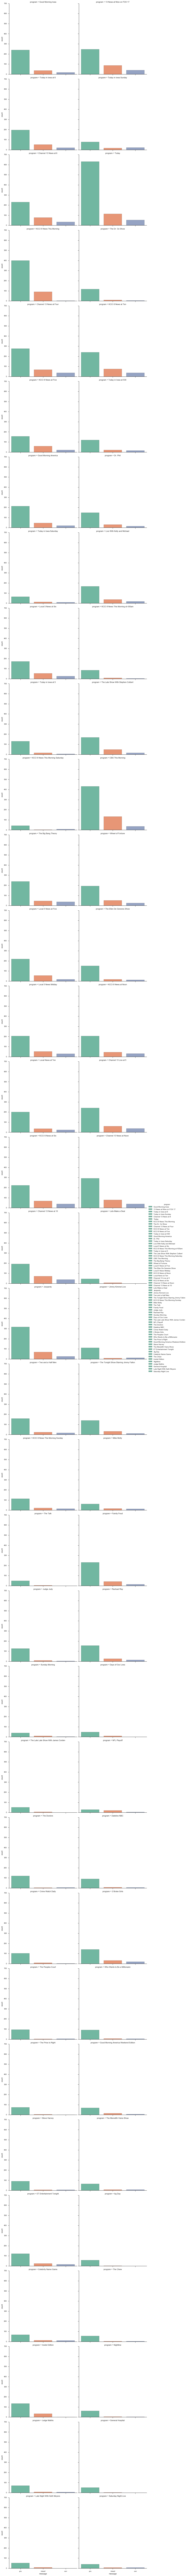

In [66]:
grid = sns.FacetGrid(pmc, col="program", hue="program", col_wrap=2, size=6)
grid.map(sns.barplot, "message", "count", palette="Set2").add_legend()

In [77]:
df = pd.read_csv('candidate_message_date.csv')

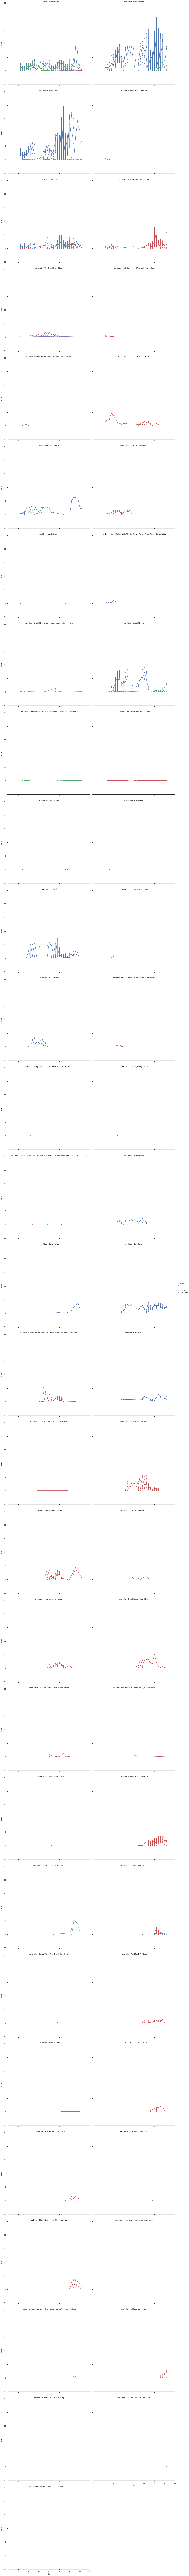

In [85]:
grid = sns.FacetGrid(df, col="candidate", hue="message", col_wrap=2, size=8, margin_titles=True)
grid.map(plt.scatter, "day", "count")
grid.map(plt.plot, "day", "count", marker="o", ms=4).add_legend()


In [19]:
cm = pd.read_csv('candidate_message_count.csv')

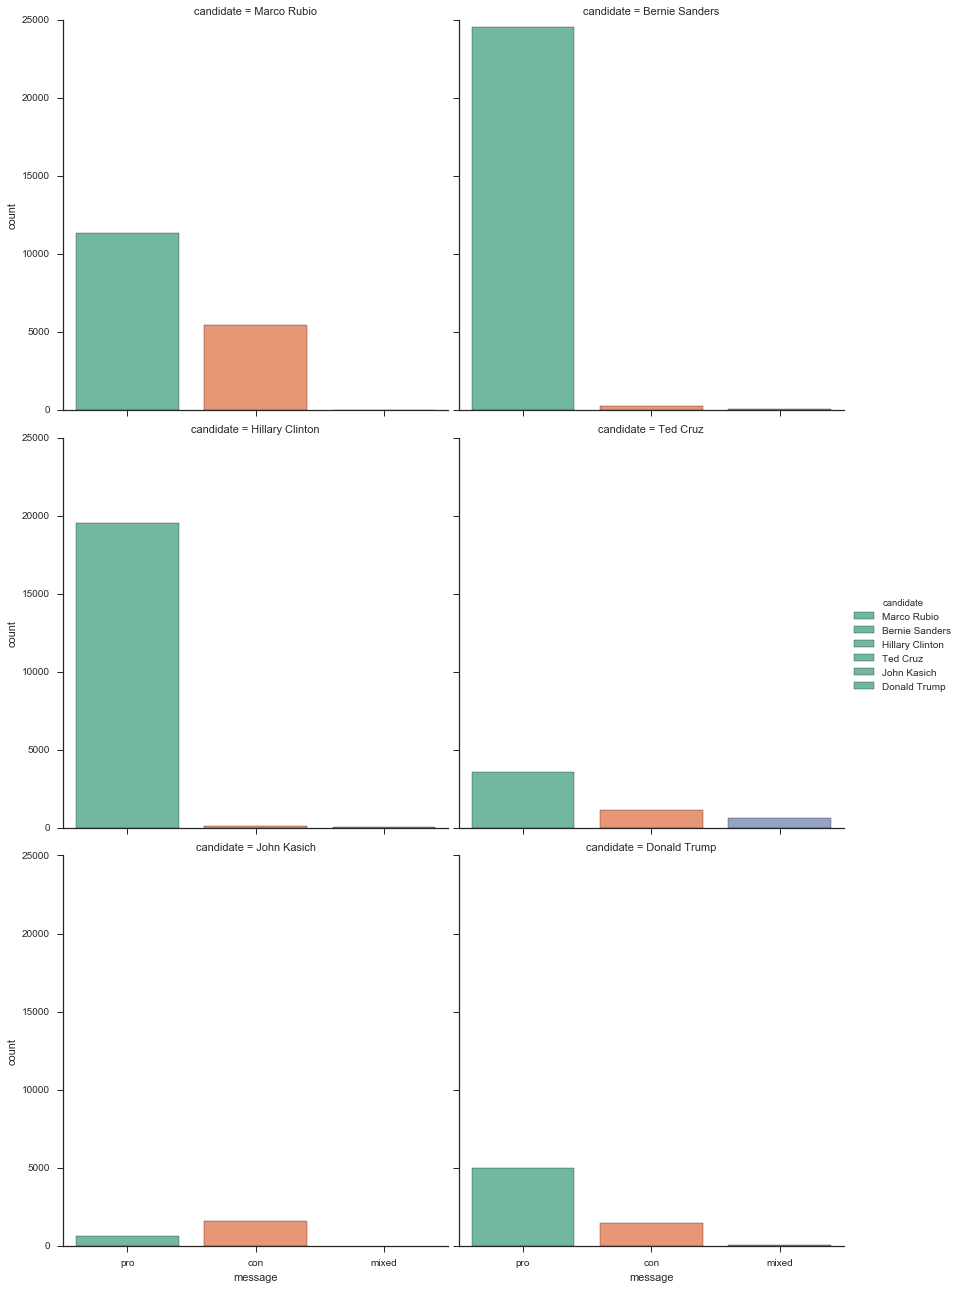

In [30]:
grid = sns.FacetGrid(cm, col="candidate", hue="candidate", col_wrap=2, size=6)
grid.map(sns.barplot, "message", "count", palette="Set2").add_legend()